In [ ]:
%pip install pandas

In [ ]:
%pip install numpy

In [ ]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 📚 Importação de Bibliotecas
Descrição: pandas: Biblioteca usada para manipulação e análise de dados em estruturas como DataFrames.

train_test_split: Função do sklearn.model_selection que divide o dataset em conjuntos de treino e teste.

LinearRegression: Classe do sklearn.linear_model utilizada para criar o modelo de regressão linear.

mean_squared_error: Função que calcula o erro quadrático médio entre os valores reais e previstos, usada para avaliar o desempenho do modelo de regressão.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import numpy as np




In [ ]:
# Carregar os dados
wine_df = pd.read_csv("wine.csv")
print(wine_df.head(10))

   class_label class_name  alcohol  malic_acid   ash  alcalinity_of_ash  \
0            1     Barolo      NaN        1.71  2.43               15.6   
1            1     Barolo    13.20        1.78  2.14               11.2   
2            1     Barolo    13.16        2.36  2.67               18.6   
3            1     Barolo    14.37        1.95  2.50               16.8   
4            1     Barolo    13.24        2.59  2.87               21.0   
5            1     Barolo    14.20        1.76  2.45               15.2   
6            1     Barolo    14.39        1.87  2.45               14.6   
7            1     Barolo    14.06        2.15  2.61               17.6   
8            1     Barolo    14.83        1.64  2.17               14.0   
9            1     Barolo    13.86        1.35  2.27               16.0   

   magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
0        127           2.80        3.06                  0.28   
1        100           2.65        2.76     

## 🔍 Verificação de Valores Ausentes
✅ Descrição: isnull(): Verifica se há valores nulos (ausentes) no DataFrame.

sum(): Soma a quantidade de valores nulos por coluna.

O comando exibe quantos valores estão ausentes em cada coluna do DataFrame wine_df.

Essa etapa é essencial para garantir a qualidade dos dados antes de aplicar algoritmos de machine learning.

In [ ]:
# Veirificar se tem dados ausentes
print("Valores ausentes antes do tratamento:")
print(wine_df.isnull().sum())

Valores ausentes antes do tratamento:
class_label             0
class_name              0
alcohol                 6
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64


✅ Descrição: select_dtypes(): Filtra as colunas do DataFrame com base no tipo de dado.

Neste caso, seleciona apenas colunas do tipo float64 ou int64, ou seja, colunas numéricas.

O resultado é uma lista com os nomes das colunas numéricas, armazenada na variável colunas_numericas.

Essa seleção evita problemas ao tentar calcular médias em colunas categóricas (como rótulos de classe).

Este bloco percorre todas as colunas numéricas do DataFrame.

A condição if coluna != 'class_label' garante que a coluna de classe (class_label) não seja modificada.

groupby('class_label'): Agrupa os dados pela classe antes de calcular a média.
transform(lambda x: x.fillna(x.mean())): Para cada grupo (classe), calcula a média da coluna e preenche os valores ausentes com essa média.

Esse método é mais robusto do que usar a média geral, pois considera características específicas de cada classe.

In [ ]:

# Seleciona apenas as colunas numéricas (ignora textos como 'class_name')
colunas_numericas = wine_df.select_dtypes(include=['float64', 'int64']).columns

# Preenche valores ausentes com a média DENTRO de cada classe
for coluna in colunas_numericas:
    if coluna != 'class_label':  # Não precisamos tratar a classe
        wine_df[coluna] = wine_df.groupby('class_label')[coluna].transform(lambda x: x.fillna(x.mean()))

NameError: name 'wine_df' is not defined

✅ Descrição: Após o preenchimento dos valores ausentes, este comando verifica novamente se ainda existem dados faltantes.

Ajuda a garantir que todos os valores ausentes foram corretamente tratados.

Ideal para validação final da etapa de limpeza de dados.

In [ ]:
# Verificar se à valores ausentes
print("Valores ausentes depois do tratamento:")
print(wine_df.isnull().sum())

Valores ausentes depois do tratamento:
class_label             0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64


In [ ]:
print(wine_df)

     class_label    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0              1  13.740536        1.71  2.43               15.6        127   
1              1  13.200000        1.78  2.14               11.2        100   
2              1  13.160000        2.36  2.67               18.6        101   
3              1  14.370000        1.95  2.50               16.8        113   
4              1  13.240000        2.59  2.87               21.0        118   
..           ...        ...         ...   ...                ...        ...   
173            3  13.710000        5.65  2.45               20.5         95   
174            3  13.400000        3.91  2.48               23.0        102   
175            3  13.151277        4.28  2.26               20.0        120   
176            3  13.170000        2.59  2.37               20.0        120   
177            3  14.130000        4.10  2.74               24.5         96   

     total_phenols  flavanoids  nonflavanoid_phenol

## 🗑️ Remoção de Colunas Não Numéricas
✅ Descrição: Este trecho verifica se a coluna 'class_name' (geralmente uma coluna categórica ou textual) existe no DataFrame.

Caso exista, ela é removida usando o método drop(columns=[...]).

A remoção de colunas categóricas como 'class_name' é importante em tarefas de clusterização não supervisionada , especialmente quando:
O algoritmo usado (como K-Means) não trabalha com variáveis categóricas diretamente.

Queremos basear a clusterização apenas em características numéricas.

In [ ]:
# Remover colunas não numéricas (exemplo: 'class_name')
if 'class_name' in wine_df.columns:
    wine_df = wine_df.drop(columns=["class_name"])

## 📊 Análise Exploratória do Dataset

✅ Descrição: wine_df.info(): Mostra informações gerais do dataset, como número de linhas, colunas, tipos de dados e valores não nulos.
wine_df.describe(): Exibe estatísticas básicas (média, desvio padrão, mín., máx., quartis) das colunas numéricas.


In [ ]:
# Análise exploratória (idem antes)
print("\nInfo do dataset:")
print(wine_df.info())
print("\nDescrição estatística:")
print(wine_df.describe())


Info do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  od280                 178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Des

## 🎯 Separação de Atributos e Rótulos

✅ Descrição: X: Contém todas as colunas do dataset exceto o rótulo (class_label), ou seja, os atributos usados para agrupamento.

y: É o rótulo verdadeiro (classe real de cada amostra), ajustado para começar em 0 ([0, 1, 2]) — útil para comparação com clusters.


In [15]:
# Separar X (atributos) e y (rótulo verdadeiro)
X = wine_df.drop(columns=["class_label"])
y = wine_df["class_label"] - 1  # Ajustar rótulos para [0, 1, 2]

NameError: name 'wine_df' is not defined

## 🧪 Clusterização com KMeans e Comparação com Rótulos Verdadeiros

✅ Descrição: StandardScaler Padroniza os dados (X) para média 0 e variância 1.

Necessário para que todas as features contribuam igualmente no cálculo de distância do KMeans.


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


NameError: name 'StandardScaler' is not defined

✅ Descrição:
Cria e ajusta o modelo KMeans com 3 clusters (número igual ao de classes no Wine).
clusters: Rótulos dos clusters atribuídos a cada amost

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_


NameError: name 'KMeans' is not defined

✅ Descrição: Mapeia os clusters encontrados para os rótulos reais usando a moda dos rótulos em cada cluster.
Isso permite comparar diretamente os clusters com as classes verdadeiras.

In [12]:
from scipy.stats import mode

mapped_clusters = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    mode_result = mode(y[mask], keepdims=True)
    mapped_clusters[mask] = mode_result.mode.item()


NameError: name 'np' is not defined

✅ Descrição: Cria uma tabela cruzada para comparar os clusters mapeados com os rótulos verdadeiros.

Mostra quantos elementos de cada classe foram agrupados em cada cluster.

In [11]:
df = pd.DataFrame({
    'Cluster Predito': mapped_clusters,
    'Rótulo Verdadeiro': y
})

crosstab = pd.crosstab(df['Cluster Predito'], df['Rótulo Verdadeiro'])
print(crosstab)


NameError: name 'mapped_clusters' is not defined

## 📈 Avaliação do Modelo com Métricas

✅ Descrição: accuracy_score: Mostra a porcentagem de acertos entre os clusters mapeados e os rótulos verdadeiros.

confusion_matrix: Exibe uma matriz que mostra como os clusters se relacionam com as classes reais (quantos acertos/erros por classe).
classification_report: Relatório detalhado com métricas como precisão , recall e F1-score por classe.

In [ ]:

# Métricas
print("Accuracy:", accuracy_score(y, mapped_clusters))
print("\nMatriz de Confusão:")
print(confusion_matrix(y, mapped_clusters))
print("\nRelatório de Classificação:")
print(classification_report(y, mapped_clusters))

Accuracy: 0.9662921348314607

Matriz de Confusão:
[[59  0  0]
 [ 3 65  3]
 [ 0  0 48]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.92      0.96        71
           2       0.94      1.00      0.97        48

    accuracy                           0.97       178
   macro avg       0.96      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178



## 📊 Visualização da Matriz de Confusão

✅ Descrição: confusion_matrix: Gera a matriz de confusão com base nos rótulos reais (y) e os clusters mapeados (mapped_clusters).

sns.heatmap: Plota a matriz como um mapa de calor usando Seaborn.
annot=True: Mostra os valores dentro de cada célula.
fmt='d': Exibe os valores como inteiros.
O gráfico ajuda a visualizar o desempenho do agrupamento de forma clara.

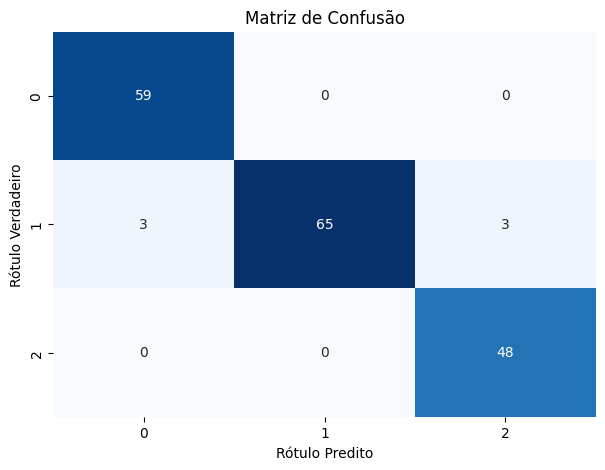

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerar matriz de confusão
cm = confusion_matrix(y, mapped_clusters)

# Plotar matriz de confusão
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulo Predito')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


In [ ]:
print(wine_df)

     class_label    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0              1  13.740536        1.71  2.43               15.6        127   
1              1  13.200000        1.78  2.14               11.2        100   
2              1  13.160000        2.36  2.67               18.6        101   
3              1  14.370000        1.95  2.50               16.8        113   
4              1  13.240000        2.59  2.87               21.0        118   
..           ...        ...         ...   ...                ...        ...   
173            3  13.710000        5.65  2.45               20.5         95   
174            3  13.400000        3.91  2.48               23.0        102   
175            3  13.151277        4.28  2.26               20.0        120   
176            3  13.170000        2.59  2.37               20.0        120   
177            3  14.130000        4.10  2.74               24.5         96   

     total_phenols  flavanoids  nonflavanoid_phenol